In [ ]:
Import the required libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import math
from sklearn.model_selection import train_test_split

Read the data ,heart disease dataset from kaggle is used as it contains both continuous and numerical variables

In [4]:
data=pd.read_csv('heart.csv')

In [5]:
data.shape

(303, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
data.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [80]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

User Defined Functions,logistic regression thereshold is used to make model to predict based on dynamic threshold.

In [71]:
def logistic_regression(x_train,y_train,x_test):
    model_log=LogisticRegression()
    model_log.fit(x_train,y_train)
    y_pred=model_log.predict(x_test)
    return y_pred
def logistic_regression_threshold(x_train,y_train,x_test,threshold):
    model_log=LogisticRegression()
    model_log.fit(x_train,y_train)
    pred=model_log.predict_proba(x_test)
    y_pred=[]
    for i in range (len(pred)):
        if pred[i][0]>threshold:
            y_pred.append(0)
        else:
            y_pred.append(1)        
    return y_pred
def metrics_calculations(y_test,y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
    tn,fp,fn,tp=metrics.confusion_matrix(y_test, y_pred).ravel()
    print("True Negative:",tn)
    print("False Positive:",fp)
    print("False Negative:",fn)
    print("True Positive:",tp)
    print("Specificity :",tn/(tn+fp))
    print("Sensitivity/Recall/TPR :",tp/(tp+fn))
    print("Precision :",tp/(tp+fp))
    #print(metrics.classification_report(y_test, y_pred))
    k=metrics.roc_curve(y_test,y_pred)
    #print(k)
    plt.figure()
    lw = 2
    print("Area Under Curve is:",metrics.auc(k[0],k[1]))
    plt.plot(k[0],k[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)'%metrics.auc(k[0],k[1]))
    plt.plot([0, 1], [0, 1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ROC')
    plt.legend(loc="lower right")
    plt.show()
def split_train(x1,y1,size):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=size,random_state=0)
    return [x_train,x_test,y_train,y_test]

Store independent and dependent variables in separate variables.

In [18]:
x=data.iloc[:,0:13] 
y=data.iloc[:,-1]

Logistic Regression

Accuracy: 0.852459016393
True Negative: 22
False Positive: 5
False Negative: 4
True Positive: 30
Specificity : 0.814814814815
Sensitivity/Recall/TPR : 0.882352941176
Precision : 0.857142857143
Area Under Curve is: 0.848583877996


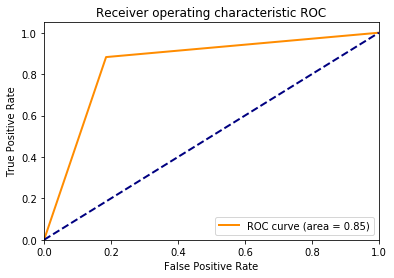

In [72]:
result=split_train(x,y,0.2)
x_train=result[0]
x_test=result[1]
y_train=result[2]
y_test=result[3]
y_pred=logistic_regression(x_train,y_train,x_test)
metrics_calculations(y_test,y_pred)

Logistic Regression with variable thresholds.

**********************  0.1 *****************************
Accuracy: 0.573770491803
True Negative: 26
False Positive: 1
False Negative: 25
True Positive: 9
Specificity : 0.962962962963
Sensitivity/Recall/TPR : 0.264705882353
Precision : 0.9
Area Under Curve is: 0.613834422658


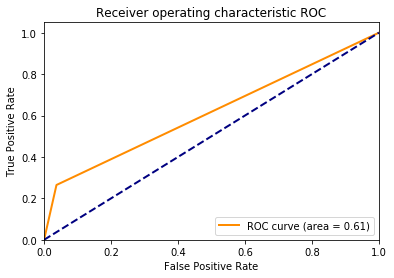

**********************  0.2 *****************************
Accuracy: 0.704918032787
True Negative: 25
False Positive: 2
False Negative: 16
True Positive: 18
Specificity : 0.925925925926
Sensitivity/Recall/TPR : 0.529411764706
Precision : 0.9
Area Under Curve is: 0.727668845316


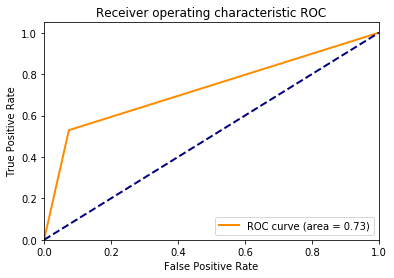

**********************  0.3 *****************************
Accuracy: 0.868852459016
True Negative: 25
False Positive: 2
False Negative: 6
True Positive: 28
Specificity : 0.925925925926
Sensitivity/Recall/TPR : 0.823529411765
Precision : 0.933333333333
Area Under Curve is: 0.874727668845


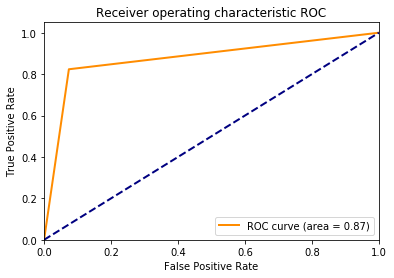

**********************  0.4 *****************************
Accuracy: 0.83606557377
True Negative: 22
False Positive: 5
False Negative: 5
True Positive: 29
Specificity : 0.814814814815
Sensitivity/Recall/TPR : 0.852941176471
Precision : 0.852941176471
Area Under Curve is: 0.833877995643


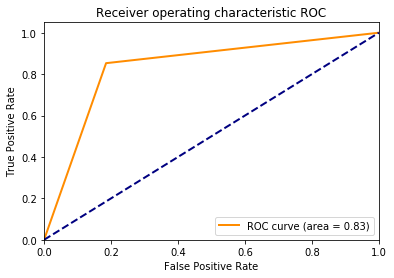

**********************  0.45 *****************************
Accuracy: 0.852459016393
True Negative: 22
False Positive: 5
False Negative: 4
True Positive: 30
Specificity : 0.814814814815
Sensitivity/Recall/TPR : 0.882352941176
Precision : 0.857142857143
Area Under Curve is: 0.848583877996


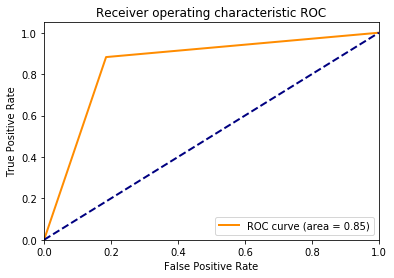

**********************  0.5 *****************************
Accuracy: 0.852459016393
True Negative: 21
False Positive: 6
False Negative: 3
True Positive: 31
Specificity : 0.777777777778
Sensitivity/Recall/TPR : 0.911764705882
Precision : 0.837837837838
Area Under Curve is: 0.84477124183


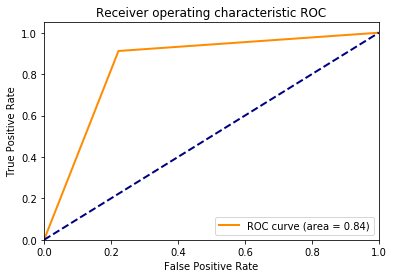

**********************  0.55 *****************************
Accuracy: 0.83606557377
True Negative: 20
False Positive: 7
False Negative: 3
True Positive: 31
Specificity : 0.740740740741
Sensitivity/Recall/TPR : 0.911764705882
Precision : 0.815789473684
Area Under Curve is: 0.826252723312


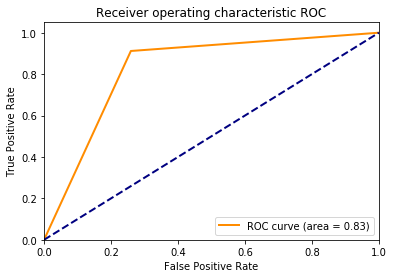

**********************  0.6 *****************************
Accuracy: 0.83606557377
True Negative: 20
False Positive: 7
False Negative: 3
True Positive: 31
Specificity : 0.740740740741
Sensitivity/Recall/TPR : 0.911764705882
Precision : 0.815789473684
Area Under Curve is: 0.826252723312


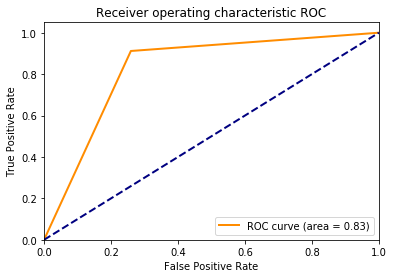

**********************  0.7 *****************************
Accuracy: 0.819672131148
True Negative: 18
False Positive: 9
False Negative: 2
True Positive: 32
Specificity : 0.666666666667
Sensitivity/Recall/TPR : 0.941176470588
Precision : 0.780487804878
Area Under Curve is: 0.803921568627


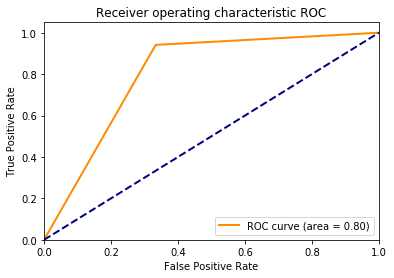

**********************  0.8 *****************************
Accuracy: 0.819672131148
True Negative: 18
False Positive: 9
False Negative: 2
True Positive: 32
Specificity : 0.666666666667
Sensitivity/Recall/TPR : 0.941176470588
Precision : 0.780487804878
Area Under Curve is: 0.803921568627


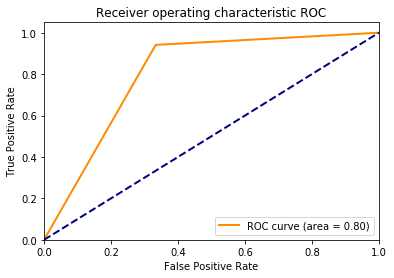

**********************  0.9 *****************************
Accuracy: 0.754098360656
True Negative: 13
False Positive: 14
False Negative: 1
True Positive: 33
Specificity : 0.481481481481
Sensitivity/Recall/TPR : 0.970588235294
Precision : 0.702127659574
Area Under Curve is: 0.726034858388


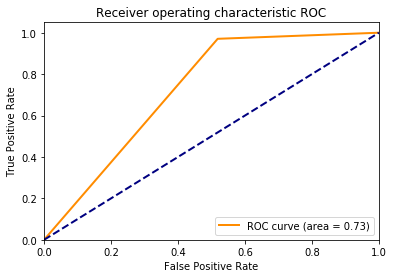

In [100]:
result=split_train(x,y,0.2)
x_train=result[0]
x_test=result[1]
y_train=result[2]
y_test=result[3]
thres=[0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9]
for i in range (len(thres)):
    print("********************** ",thres[i],"*****************************")
    y_pred_th=logistic_regression_threshold(x_train,y_train,x_test,thres[i])
    metrics_calculations(y_test,y_pred_th)

From the performance metrics of models with various thresholds,The accuracy of model with default threshold was 0.8524 but model with .3 as threshold had 0.8688 accuracy and aslo in terms of ROC curve it was 84% with normal threshold but 87.4% in .3 threshold. 

Implement Logistic Regression From Scratch
https://www.kaggle.com/anthonysegura/logistic-regression-from-scratch

In [78]:
import warnings 
warnings.filterwarnings('ignore')
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.tools.plotting import parallel_coordinates
from scipy import optimize as op

303

In [81]:
m=data.shape[0]
#Features
n=13
#Number of classes
k=2
col_name=data.columns

'age'

In [85]:
x=np.ones((m,n + 1))
y=np.array((m,1))
y = data['target'].values
for j in range(n):
    x[:,j] = data[col_name[j]].values
    x[:,j] = (x[:,j] - x[:,j].mean())
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.2, random_state = 11)

In [89]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

#Regularized cost function
def regCostFunction(theta,x,y,_lambda = 0.1):
    m=len(y)
    h=sigmoid(x.dot(theta))
    reg=(_lambda/(2 * m)) * np.sum(theta**2)
    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

#Regularized gradient function
def regGradient(theta,x,y,_lambda = 0.1):
    m,n=x.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    h = sigmoid(x.dot(theta))
    reg = _lambda * theta /m
    return ((1 / m) * x.T.dot(h - y)) + reg

#Optimal theta 
def logisticRegression(x, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (x, y),
                         method = 'TNC', jac = regGradient)
    return result.x

Accuracy: 0.803278688525
True Negative: 17
False Positive: 7
False Negative: 5
True Positive: 32
Specificity : 0.708333333333
Sensitivity/Recall/TPR : 0.864864864865
Precision : 0.820512820513
Area Under Curve is: 0.786599099099


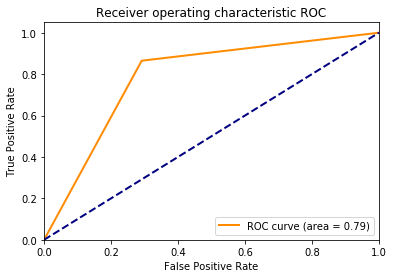

In [98]:
all_theta = np.zeros((k, n + 1))
i = 0
target_c=[0,1]
for rows in target_c:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == rows, dtype = int)
    optTheta = logisticRegression(x_train,tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1
#Predictions
P = sigmoid(x_test.dot(all_theta.T))
p = [target_c[np.argmax(P[i, :])] for i in range(x_test.shape[0])]
metrics_calculations(y_test,p)
#print("Test Accuracy ", metrics.accuracy_score(y_test, p) * 100 , '%')